# ISE 529 Final Project -  Mercedes-Benz Greener Manufacturing

## Section: Wednesday
Qinhao Chang 3791075845

Shaoqian Chen 8831737894

Dingfang Chen 5464937395

Wei Li 6081121014


In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df,test_df]

In [3]:
# preview the data get a sense of what it looks like
train_df.head(3)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0


In [4]:
train_df.tail(3)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0
4208,8417,110.85,z,r,ae,c,d,aa,g,w,...,1,0,0,0,0,0,0,0,0,0


In [5]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [6]:
train_df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#locate 0 element
train_df.describe(include=['O'])

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


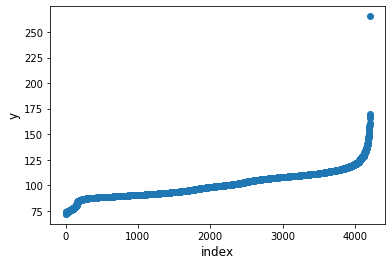

In [9]:
#Find an outlier
plt.figure(figsize=(6,4))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

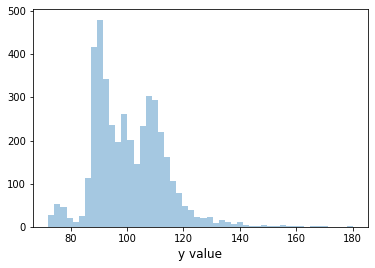

In [12]:
ulimit = 180
train_df.loc[train_df['y']>ulimit] = ulimit

plt.figure(figsize=(6,4))
sns.distplot(train_df.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

In [15]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


## 1. Feature Analysis
   ######  369 int64 = actually binary values
   ######  1 float64 = target variable
   ######  8 ibject = categorical features  

In [18]:
dtype_df.iloc[:10,:].transpose()
#Identify that from X0 to X8 are categorical columns

,0,1,2,3,4,5,6,7,8,9
Count,ID,y,X0,X1,X2,X3,X4,X5,X6,X8
Column Type,int64,float64,object,object,object,object,object,object,object,object


X0,X1,X2,X3,X4,X5,X6,X7,X8 are categorical columns

In [19]:
#check for missing value 
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


There is no missing value in the given dataset

In [20]:
train_df_copy = train_df.copy()
train_df_copy.head(3)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0


## 2. Converting all Categorical variables

In [21]:
def to_one_hot(column, df):
    """
    Replaces a given column with N new one-hot encoded columns.
    N = number of unique values of given column.
    """
    # Get unique values of column
    unique_vals = df[column].unique()
    # Add a new zero-filled column for each unique value
    for val in unique_vals:
        new_column_name = column + val
        df[new_column_name] = 0   
    # Put 1s to new columns:
    row_idx = 0
    for categ_val in df[column].values:
        column_name = column + categ_val
        df.at[row_idx, column_name] = 1
        row_idx += 1
    # Remove the column with categorical values
    df.drop(column, axis=1, inplace=True)
    
    print("Replaced categorical column {} with {} new columns."
          .format(column, len(unique_vals)))
    
    return df

In [22]:
def all_to_one_hot(df):
    """
    Replaces all categorical columns by one-hot encoded columns.
    See: to_one_hot(column, df)
    """
    # Get a list of categorical column names
    categorical_columns = list(train_df.select_dtypes(include=['object']))
    print("These {} categorical columns will be replaced: {}"
          .format(len(categorical_columns), categorical_columns))
    for column in categorical_columns:
        df = to_one_hot(column, df)
    print("New shape of dataframe after all replacements: ", df.shape)
    return df

In [23]:
#convert all categorical features
train_df = all_to_one_hot(train_df)
train_df.head()

These 8 categorical columns will be replaced: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
Replaced categorical column X0 with 47 new columns.
Replaced categorical column X1 with 27 new columns.
Replaced categorical column X2 with 44 new columns.
Replaced categorical column X3 with 7 new columns.
Replaced categorical column X4 with 4 new columns.
Replaced categorical column X5 with 29 new columns.
Replaced categorical column X6 with 12 new columns.
Replaced categorical column X8 with 25 new columns.
New shape of dataframe after all replacements:  (4209, 565)


,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X8q,X8w,X8g,X8y,X8l,X8f,X8u,X8r,X8t,X8c
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 565 entries, ID to X8c
dtypes: float64(1), int64(564)
memory usage: 18.1 MB


## 3. Dimensionality Reduction
###### -Discard the ones with only 1 value
###### -Remove ID column
###### -Remove outliers

In [25]:
def get_constant_columns(df):
    constant_columns = []
    for column in list(df):
        if len(df[column].unique()) == 1:
            constant_columns.append(column)
    print("Constant columns ({}): {}"
          .format(len(constant_columns), constant_columns))
    return constant_columns

In [26]:
constant_columns = get_constant_columns(train_df)

Constant columns (12): ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [27]:
def drop_columns(df, columns):
    for column in columns:
        df.drop(column, axis=1, inplace=True)
    print("Dropped {} columns: {}".format(len(columns), columns))
    return df

In [28]:
train_df = drop_columns(train_df, constant_columns)
train_df.head(3)

Dropped 12 columns: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,...,X8q,X8w,X8g,X8y,X8l,X8f,X8u,X8r,X8t,X8c
0,0,130.81,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
outlier_row_index = train_df['y'].idxmax()
train_df = train_df.drop(train_df.index[outlier_row_index])
print("Removed outlier at row index {}. New shape of dataframe = {}"
      .format(outlier_row_index, train_df.shape))

Removed outlier at row index 883. New shape of dataframe = (4208, 553)


In [30]:
train_df = train_df.drop('ID', axis = 1)
print("Removed the ID column. New shape of dataframe = {}"
      .format(train_df.shape))
train_df.head(3)

Removed the ID column. New shape of dataframe = (4208, 552)


,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X8q,X8w,X8g,X8y,X8l,X8f,X8u,X8r,X8t,X8c
0,130.81,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,88.53,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,76.26,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature selecting(one-hot encode)

In [31]:
train_y = train_df['y'].values 
train_X = train_df.drop(["y"], axis=1)

Feature importance with xgb model

In [32]:
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), 
                  dtrain, num_boost_round=100, 
                  feval=xgb_r2_score, maximize=True)

[15:15:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


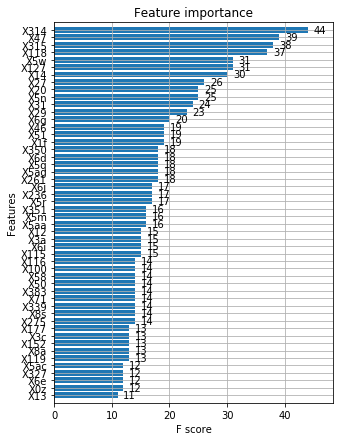

In [34]:
fig, ax = plt.subplots(figsize=(5,7))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

Feature importance with randomforest model

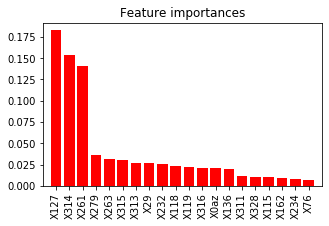

In [36]:
from sklearn import ensemble
model = ensemble.RandomForestRegressor(n_estimators=200, 
                                       max_depth=10, 
                                       min_samples_leaf=4, 
                                       max_features=0.2, 
                                       n_jobs=-1, random_state=0)
model.fit(train_X, train_y)
feat_names = train_X.columns.values

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(5,3))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

# Feature selecting(label Encoder)

In [37]:
train_df_copy.head(3)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0


In [38]:
train_df.head(3)

,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X8q,X8w,X8g,X8y,X8l,X8f,X8u,X8r,X8t,X8c
0,130.81,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,88.53,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,76.26,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df_copy[f].values)) 
        train_df_copy[f] = lbl.transform(list(train_df_copy[f].values))

In [40]:
train_df_copy.head(3)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0


[15:17:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


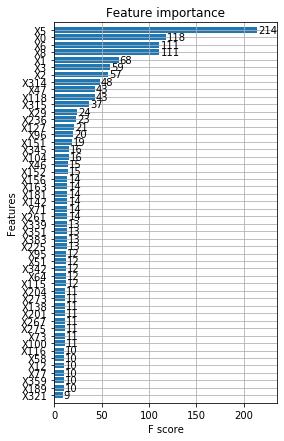

In [41]:
train_y = train_df_copy['y'].values
train_X = train_df_copy.drop(["ID", "y"], axis=1)

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, 
                     feature_names=train_X.columns.values)
model_xgb_labelencoder = xgb.train(dict(xgb_params, silent=0), 
                                   dtrain, num_boost_round=100, 
                                   feval=xgb_r2_score, 
                                   maximize=True)

# plot the important features #
fig, ax = plt.subplots(figsize=(4,7))
xgb.plot_importance(model_xgb_labelencoder, 
                    max_num_features=50, height=0.8, ax=ax)
plt.show()

## Features with Randomforest

In [42]:
model_rf_labelencoder = \
    ensemble.RandomForestRegressor(n_estimators=200, 
                                   max_depth=10, 
                                   min_samples_leaf=4, 
                                   max_features=0.2, 
                                   n_jobs=-1, random_state=0)
model.fit(train_X, train_y)
feat_names = train_X.columns.values

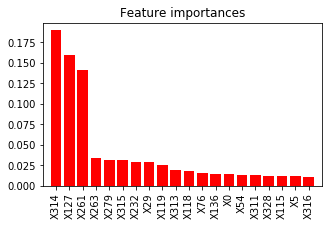

In [43]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], 
             axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(5,3))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], 
        color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], 
           rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

## Use sklearn feature selection(select by model)

In [47]:
from sklearn.feature_selection import SelectFromModel

rf_selector = \
    SelectFromModel(ensemble.RandomForestRegressor(n_estimators=200, 
                                    max_depth=10, 
                                    min_samples_leaf=4, 
                                    max_features=0.2, 
                                    n_jobs=-1, random_state=0))
rf_selector.fit(train_X, train_y)
rf_support = rf_selector.get_support()
rf_feature = train_X.loc[:,rf_support].columns.tolist()
print(rf_feature)

['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8', 'X29', 'X47', 'X54', 'X76', 'X80', 'X115', 'X118', 'X119', 'X127', 'X136', 'X162', 'X178', 'X223', 'X232', 'X234', 'X238', 'X250', 'X261', 'X263', 'X275', 'X276', 'X279', 'X311', 'X313', 'X314', 'X315', 'X316', 'X328', 'X348']


## Use RFE to select features

In [49]:
from sklearn.feature_selection import RFE

In [53]:
rfe_selector = \
    RFE(estimator=ensemble.RandomForestRegressor(n_estimators=10), 
        n_features_to_select=300, step=10, verbose=5)

In [55]:
rfe_selector.fit(train_X, train_y)
rfe_support = rfe_selector.get_support()
rfe_feature = train_X.loc[:,rfe_support].columns.tolist()

Fitting estimator with 376 features.
Fitting estimator with 366 features.
Fitting estimator with 356 features.
Fitting estimator with 346 features.
Fitting estimator with 336 features.
Fitting estimator with 326 features.
Fitting estimator with 316 features.
Fitting estimator with 306 features.


# Modeling with feature selected by sklearn feature selection

In [56]:
train_df_copy.head(3)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0


In [58]:
#labelencode test data 
test_df_copy = test_df.copy()

In [59]:
test_df_copy.head(3)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0


In [60]:
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(test_df_copy[f].values)) 
        test_df_copy[f] = lbl.transform(list(test_df_copy[f].values))

In [61]:
test_df_copy.head(3)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = \
    train_test_split(train_df_copy[rf_feature], 
                     train_df_copy['y'], 
                     test_size=0.2, random_state=1)

In [66]:
X_test  = test_df_copy[rf_feature]

In [70]:
#RandomForest
model1 = ensemble.RandomForestRegressor(n_estimators=200, 
                                        max_depth=10, 
                                        min_samples_leaf=4, 
                                        max_features=0.2, 
                                        n_jobs=-1, random_state=0)
model1.fit(x_train, y_train);

In [71]:
y1_prediction = model1.predict(x_test)
mean_squared_error(y_test,y1_prediction)

66.41763559624022

In [72]:
#MSE is 66.41763559624022

In [73]:
p_test =model1.predict(X_test)
sklearnRandomForest = pd.DataFrame()
sklearnRandomForest['ID'] = test_df_copy['ID']
sklearnRandomForest['y'] = p_test
sklearnRandomForest.to_csv('sklearnRandomForest.csv', index=False)

In [75]:
#train xgb model
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,'max_depth': 6,'subsample': 0.7,
    'colsample_bytree': 0.7,'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(x_train, y_train, feature_names=x_train.columns.values)
model2 = xgb.train(dict(xgb_params, silent=0), 
                   dtrain, num_boost_round=100, feval=xgb_r2_score, maximize=True)

[15:24:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [76]:
dtest = xgb.DMatrix(x_test, feature_names= x_test.columns.values)

In [77]:
y2_prediction = model2.predict(dtest)
mean_squared_error(y_test,y2_prediction)

67.82078388634886

In [78]:
#MSE is 67.82078388634886.

In [79]:
dtest11 = xgb.DMatrix(X_test, feature_names= X_test.columns.values)

In [80]:
p_test =model2.predict(dtest11)
sklearnxgb = pd.DataFrame()
sklearnxgb ['ID'] = test_df_copy['ID']
sklearnxgb ['y'] = p_test
sklearnxgb .to_csv('sklearnxgb .csv', index=False)

# Model with feature selected by rfe slection

In [81]:
#use rfe feature fit randomforest model
X1_test  = test_df_copy[rfe_feature]

In [82]:
x1_train, x1_test, y1_train, y1_test = \
    train_test_split(train_df_copy[rfe_feature], 
                     train_df_copy['y'], 
                     test_size=0.2, random_state=1)

In [83]:
#RandomForest
model21 = ensemble.RandomForestRegressor(n_estimators=200, 
                                         max_depth=10, 
                                         min_samples_leaf=4, 
                                         max_features=0.2, 
                                         n_jobs=-1, random_state=0)
model21.fit(x1_train, y1_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=0.2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [84]:
y21_prediction = model21.predict(x1_test)
mean_squared_error(y1_test,y21_prediction)

66.29316124637023

In [85]:
#MSE is 66.5698379702297.

In [86]:
p_test =model21.predict(X1_test)
rfeRandomForest = pd.DataFrame()
rfeRandomForest['ID'] = test_df_copy['ID']
rfeRandomForest['y'] = p_test
rfeRandomForest.to_csv('rfeRandomForest.csv', index=False)

In [88]:
#train xgb model
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,'max_depth': 6,'subsample': 0.7,
    'colsample_bytree': 0.7,'objective': 'reg:linear',
    'silent': 1
}
d1train = xgb.DMatrix(x1_train, y1_train, feature_names=x1_train.columns.values)
model22 = xgb.train(dict(xgb_params, silent=0), 
                    d1train, num_boost_round=100, 
                    feval=xgb_r2_score, maximize=True)

[15:25:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [89]:
dtest21 = xgb.DMatrix(x1_test, feature_names= x1_test.columns.values)

In [90]:
y22_prediction = model22.predict(dtest21)
mean_squared_error(y1_test,y22_prediction)

67.73267100150915

In [91]:
#MSE is 67.76520234941157.

In [92]:
dtest22 = xgb.DMatrix(X1_test, feature_names= X1_test.columns.values)

In [93]:
p_test =model22.predict(dtest22)
rfexg = pd.DataFrame()
rfexg['ID'] = test_df_copy['ID']
rfexg['y'] = p_test
rfexg.to_csv('rfexg.csv', index=False)

# Feature selecting (getdummy) and model

In [94]:
#use get dummy to process categorical variable get new data sets
train_df2 = pd.read_csv('train.csv')
test_df2 = pd.read_csv('test.csv')

In [95]:
test_df2["y"] = 0
test_df2 = test_df2[ ["ID", "y"] + 
                  [col for col in test_df2.columns if col not in ["ID", "y"]] ]
combine2 = pd.concat([train_df2, test_df2], axis=0)

In [96]:
combine2.shape

(8418, 378)

In [97]:
combine2 = pd.get_dummies(combine2, columns = ["X0","X1","X2","X3","X4","X5","X6","X8"])

In [98]:
# train_df and test_df are free of categorical variables
train_df2 = combine2.head(4209)
test_df2 = combine2.tail(4209).drop("y", axis=1)

In [99]:
train_df2.head(3)

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [100]:
test_df2.head(3)

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
train_y = train_df2['y'].values 
train_X = train_df2.drop(['ID',"y"], axis=1)

In [102]:
#fit xgb model to select features
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,'max_depth': 6,'subsample': 0.7,
    'colsample_bytree': 0.7,'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100, feval=xgb_r2_score, maximize=True)

[15:25:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


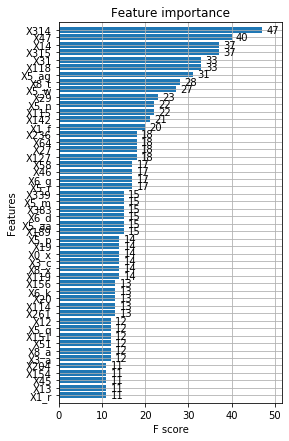

In [103]:
fig, ax = plt.subplots(figsize=(4,7))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

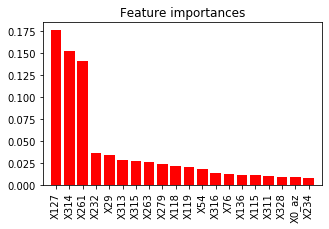

In [104]:
from sklearn import ensemble
model = ensemble.RandomForestRegressor(n_estimators=200,
                                       max_depth=10, 
                                       min_samples_leaf=4, 
                                       max_features=0.2, 
                                       n_jobs=-1, random_state=0)
model.fit(train_X, train_y)
feat_names = train_X.columns.values

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(5,3))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [106]:
# Random forest model

In [107]:
x2_train, x2_test, y2_train, y2_test = \
    train_test_split(train_df2.drop(['ID',"y"], axis=1), 
                     train_df2['y'], 
                     test_size=0.2, random_state=1)

In [108]:
model31 = ensemble.RandomForestRegressor(n_estimators=200, 
                                         max_depth=10, 
                                         min_samples_leaf=4, 
                                         max_features=0.2, n_jobs=-1, 
                                         random_state=0)
model31.fit(x2_train, y2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=0.2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [109]:
X3_test  = test_df2.drop(['ID'],axis=1)

In [110]:
y31_predict = model31.predict(x2_test)

In [111]:
mean_squared_error(y2_test,y31_predict)

66.38704037500776

In [112]:
#MSE is 66.38704037500776.

In [113]:
p_test =model31.predict(X3_test)
dummyRandomForest = pd.DataFrame()
dummyRandomForest['ID'] = test_df2['ID']
dummyRandomForest['y'] = p_test
dummyRandomForest.to_csv('dummyRandomForest.csv', index=False)

In [114]:
#xgb training for dummy

In [116]:
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,'max_depth': 6,'subsample': 0.7,
    'colsample_bytree': 0.7,'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(x2_train, y2_train, feature_names=train_X.columns.values)
model32 = xgb.train(dict(xgb_params, silent=0), dtrain, 
                    num_boost_round=100, feval=xgb_r2_score, maximize=True)

[15:27:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [117]:
dtest32 = xgb.DMatrix(x2_test, feature_names= x2_test.columns.values)

In [118]:
y32_predict = model32.predict(dtest32)

In [119]:
mean_squared_error(y2_test,y32_predict)

68.59789043470498

In [120]:
#MSE is 68.59789043470498.

In [121]:
dtest33 = xgb.DMatrix(X3_test, feature_names= X3_test.columns.values)
p_test =model32.predict(dtest33)
dummyxg = pd.DataFrame()
dummyxg['ID'] = test_df2['ID']
dummyxg['y'] = p_test
dummyxg.to_csv('dummyxg.csv', index=False)

## XGBRegressor Tuning with GridSearchCV

In [125]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = [{
    'max_depth':[3,5],
    'n_estimators':[100,200]
}]

gsc = GridSearchCV(xgb.XGBRegressor(objective ='reg:squarederror'),
                   param_grid,cv=5,scoring='r2',
                  return_train_score = True)
gsc.fit(x2_train,y2_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [3, 5], 'n_estimators': [100, 200]}],
             pre_dispatch='2*n_jobs', r

In [126]:
gsc.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [127]:
gsc.best_score_

0.5572866510984291

In [128]:
tunedxg = xgb.XGBRegressor(max_depth=3, n_estimators=100)
tunedxg.fit(x2_train, y2_train)
preds = tunedxg.predict(X3_test)
preds

[15:34:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([ 82.544205,  97.761154,  82.707535, ...,  92.12876 , 109.20823 ,
        92.85559 ], dtype=float32)

In [129]:
submission = pd.DataFrame({"ID": test_df2["ID"], "y": preds})
submission.to_csv('subn.csv', index=False)

# SCORE 0.54238